In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

# COCO-Stuff dataset
* The images in the COCO-Stuff dataset have been annotated for semantic segmentation for an additional **91 classes** (called '**stuff'**) that do not overlap with the **80 classes** (called **'things'**) found in the original COCO dataset. 

* The classes in the Stuff include textures both natural (sand, sky, trees etc.) and manmade (bricks, concrete, stone, tiles, walls with tile, wood etc), different weather conditions (fog, clouds, water-drops etc.), structures (buildings, bridges, railroads etc.). 

The figure below shows an image, original COCO annotations and COCO-Stuff annotations.

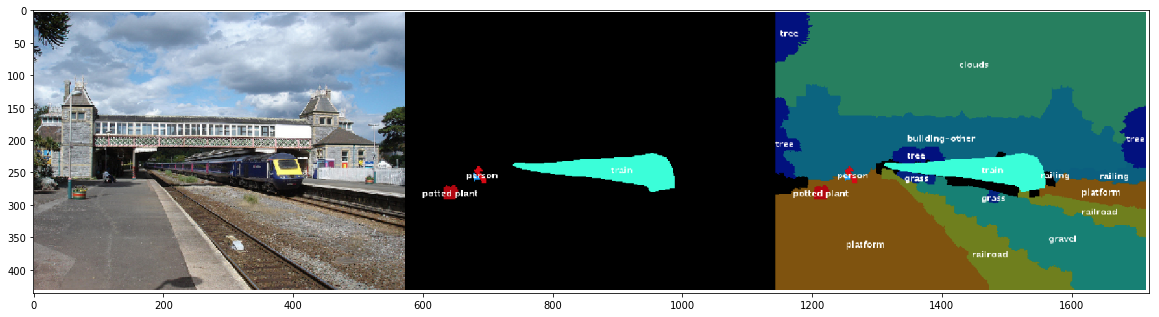

In [2]:
plt.figure(figsize=(20,20))
img=mpimg.imread('compare.png')
imgplot = plt.imshow(img)
plt.show()

# Experiment
* The notebook will focus on creating **co-occurrence, conditional probability** and **frequence of occurrence** of different class items in the **'stuff'** category of labels. Future work will include computing these statistics considering both 'things' and 'stuff'.

* The following sections include code for computing and plotting the above statistics using the **ground truth** annotations in the training split of the COCO-Stuff dataset.

* The plots for these different statistics can be found at the end.

In [3]:
file =  open('stuff_train2017.json','r')
file_str = file.read()
data = json.loads(file_str)

In [4]:
# form a dictionary out of the categories
category_dict = {}
prev_id = -1
stuff_classes = []
for item in data['categories']:
    current_id = item['id']
    category_dict[current_id] = item['name']
    stuff_classes.append(item['name'])

In [5]:
# form a dictionary of image id to url mapping
url_dict = {}
for item in data['images']:
    url_dict[item['id']] = item['coco_url']

In [6]:
# get all annotations
annotations = data['annotations']

In [7]:
# get the co-occurrence and occurrence statistics
count = 1
prev_image_id = -1
last_batch = []

co_occurrence_matrix = np.zeros((92,92))
occurrence_vector = np.zeros(92)


for item in annotations:
    image_id = item['image_id']
    if image_id != prev_image_id:
        last_batch_unique = np.unique(last_batch)
        # get the co-occurrence matrix
        for item_1 in last_batch_unique:
            occurrence_vector[item_1-92] += 1
            for item_2 in last_batch_unique:
                if item_1 != item_2:
                    co_occurrence_matrix[item_1-92,item_2-92] += 1
                    co_occurrence_matrix[item_2-92,item_1-92] += 1
        last_batch = []
        
    last_batch.append(item['category_id'])
    prev_image_id = image_id
    count += 1
    
conditional_probability_matrix = co_occurrence_matrix / occurrence_vector

# Plots for Square Root of Co-occurrence, Conditional Probability and Frequency of Different Classes

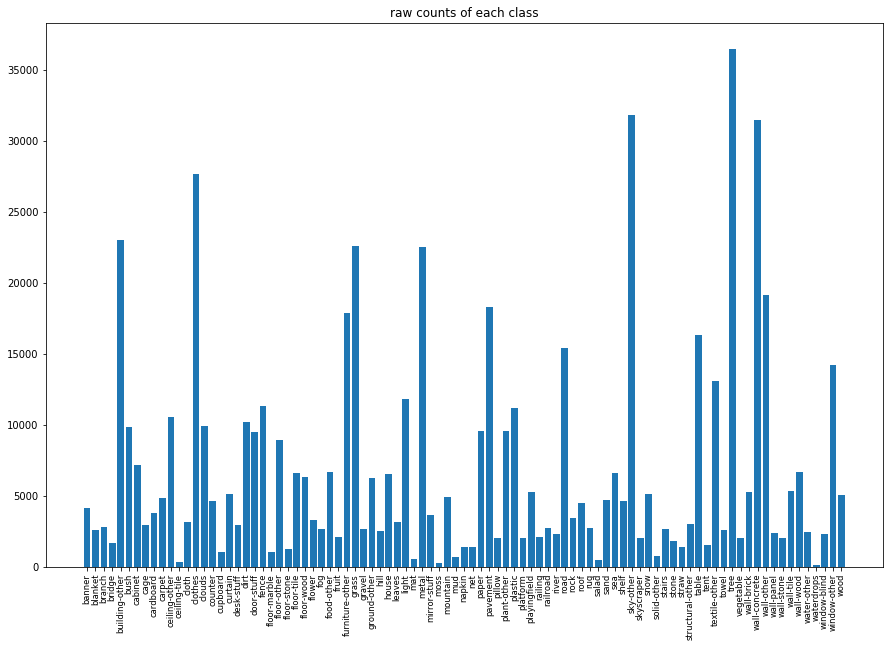

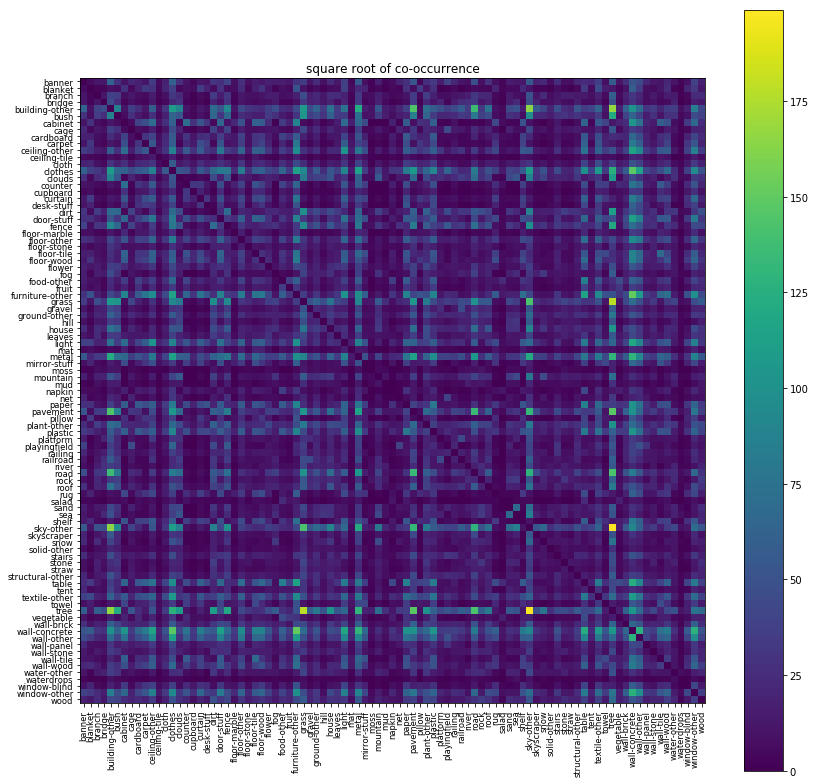

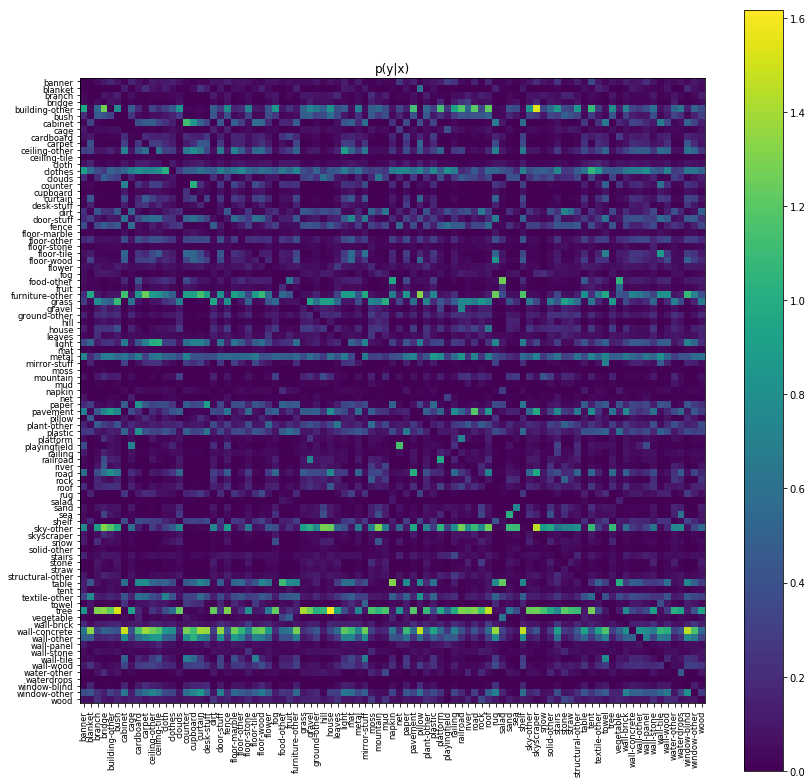

In [8]:
# remove 'other' class from set of classes
stuff_classes = stuff_classes[0:91]

# remove other 'class' from co-occurrence matrix
co_occurrence_matrix_plot = co_occurrence_matrix[0:91, 0:91]

# compute square root of co-occurrence matrix
co_occurrence_sqrt_matrix_plot = np.sqrt(co_occurrence_matrix_plot)
occurrence_vector_plot = occurrence_vector[0:91]

# remove other 'class' from coditional probability matrix
conditional_probability_matrix_plot = conditional_probability_matrix[0:91,0:91]

num_classes = len(stuff_classes)

plt.figure(figsize=(15,10))
plt.bar(np.arange(num_classes), occurrence_vector_plot)
plt.xticks(np.arange(num_classes), stuff_classes, rotation=90, fontsize="small")
plt.title('raw counts of each class')
plt.savefig('frequency-plot.png')
plt.show()

# plot sqrt of co-occurrence matrix
plt.figure(figsize=(14,14))
plt.xticks(np.arange(num_classes), stuff_classes, rotation=90, fontsize="small")
plt.yticks(np.arange(num_classes), stuff_classes, rotation=0, fontsize="small")
plt.imshow(co_occurrence_sqrt_matrix_plot, cmap='viridis', interpolation='nearest')
plt.title('square root of co-occurrence')
plt.colorbar()
plt.savefig('co-occurence-sqrt-plot.png')
plt.show()

# plot conditional probability matrix
plt.figure(figsize=(14,14))
plt.xticks(np.arange(num_classes), stuff_classes, rotation=90, fontsize="small")
plt.yticks(np.arange(num_classes), stuff_classes, rotation=0, fontsize="small")
plt.imshow(conditional_probability_matrix_plot, cmap='viridis', interpolation='nearest')
plt.title('p(y|x)')
plt.colorbar()
plt.savefig('conditional-probability-plot.png')
plt.show()

# Future Work

Future work will consist of the following:

2. Compute the above statistics for combined set of classes in 'stuff' and 'things'.

3. Run networks trained on COCO-Stuff dataset to compute statistics using more realistic (and more messy) images. Retrain existing networks with new realistic images if need be.

4. Come up with a better co-occurrence metric that takes distance into account i.e. items that are closer get higher scores.
